# [COM3240] Lab 6: Reinforcement Learning with ANNs

## Overview

In the previous lab you were given a simple reinforcement learning scenario. However, it is possible to implement your algorithm on an **Artificial Neural Network (ANN)**. 

The key idea is that **ANNs are universal function approximators**. You will use them to create a function where the input is the state and the output the Q-value of each action. In this case, you do not need to use a table to retain the Q-values. This is especially advantageous when you deal with problems with a large state and action space.

### Implementing the monkey scenario with an ANN

To use an ANN, you need to represent the two images as an input vector -- for example, a column vector, with [1 0] representing the Balloon and [0 1] the bicycle. Then, you have to use a 2x2 weight matrix, and the network will produce a 2x1 output vector. This output vector will represent the Q-value, i.e. the position Qvalue[0] represents the Q-value of Green and Qvalue[1] represents the Q-value of Red.

#### How do the Q-values change?

In this setup, the Q-values are updated in an indirect way by modifying the synaptic weights. It turns out that a hebbian rule with a reward-dependent factor allows us to modify the weights appropriately: 

$\Delta w_{i,j} =  \eta\left[r-Q(s,i)\right]x_ix_j^s$,

where $r$ is the reward, $Q(s,i)$ the Q-value of state $s$ and action $i$ (the selected action), $x_i$ the activity of the neuron that represents the selected action, and $x_j^s$ the j-th presynaptic neuron, where $j$ is an index on the elements of the column input vector.

_Note_: we assume that $x_j^s$  is 1 for the neuron that represents the action we took (and 0 for the others) and NOT its output value.

#### How do we write this in python?

To write this with vectors one can use a "mask", i.e. a vector with 1 in the position corresponding to the action we chose and 0 everywhere else. For instance, under a greedy policy, if Qvalue=[0,5 0.7] then we would select the second action. The mask then would be rectOutput=[0 1] (for rectified Output). We can use the outer product to update only the weights of the selected action (neuron).

The outer product of two arrays a and b is defined as a matrix M where M[i,j] = a[i] * b[j]. Each element in the resulting matrix is the product of an element from a and an element from b. To calculate this product with two vectors, it means that if they have length n the matrix reulting as part of this operation will be nxn. 

We will use the command np.outer between rectOutput and Input representation. Since they are vectors with n elements, their inner product will give an nxn Matrix. You need to be careful with the order by which you pass the arguments, to get the correct result.

In [1]:
# example
import numpy as np
a = np.array([4,5,6])
b = np.array([1,2,3])

print("np.outer(a,b): \n", np.outer(a,b), "\n")
print("np.outer(b,a): \n", np.outer(b,a))

np.outer(a,b): 
 [[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]] 

np.outer(b,a): 
 [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


### Exercises

**1. Study the code implementing an ANN to deal with the reinforcement learning scenario of the prvioous lab.**
- You will have to understand the code in order to preoceed to the next exercise.

**2. Code the weights update.** 
- see TODO comment in the code.

**3. Explore the effect of the parameters on the performance of your network.**
- First, try the parameters nTrials, learningRate, repetitions.
- Then, change the parameter epsilon which controls exploration vs. exploitation and see its effect on the ANN. 

### Function that returns the rewards for each trial - ANN version 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def monkey_nn(nTrials,learningRate,epsilon):

    # States and Actions
    Balloon = 0
    Bicycle = 1

    Red = 0
    Green = 1

    nStates = 2
    nActions = 2

    # Define input as unit vectors to present to the network --> Balloon=(1,0), Bicycle=(0,1)
    states = np.eye(nStates)

    # Weights matrix, connecting input neurons (state) to output neurons (actions). Initially random
    weights = np.random.rand(nActions,nStates)

    # Define reward vector (one position for each trial) and initialise it to zero
    Rewards = np.zeros((1,nTrials))

    # Start the episode
    for trial in range(nTrials):

        # Present a picture / state Balloon=0 Bicycle=1
        Image = np.random.randint(2) # Half times Balloon, half times Bicycle

        # Compute Qvalues. Qvalue is 2x1, one value for each output neuron
        Qvalue = np.matmul(weights,states[Image,:])

        # Epsilon-greedy parameter
        # with probability epsilon choose action at random; if epsilon = 0 then always choose Greedy
        eGreedy = int(np.random.rand() < epsilon) 

        # Implement the policy
        if Qvalue[Red] == Qvalue[Green] or eGreedy:
            # if Qvalues are the same or epsilon>0 (e-Greedy) choose one at random
            Action = np.random.randint(2) 
        else:
            # otherwise choose greedy
            # will result Action=1 (Green) if Qvalue(Image,Green)>Qvalue(Imgage,Red)
            Action = int(Qvalue[Green] > Qvalue[Red]) 

        # Collect reward
        if Image == Balloon and Action == Green:
            r = 1
        elif Image == Bicycle and Action == Red:
            r = 1
        else:
            r = 0

        # Rectified output - a binary array with a single non-zero element corresponding to the selected action. 
        # This is in order to update the weights only to the neuron whose action was selected
        rectOutput = np.zeros((2,1))
        rectOutput[Action,0] = 1

        # TODO: Update weigths
        #weights += 

        # Store reward for the current trial
        Rewards[0,trial] = r

    return Rewards

### Function that calls `monkey_nn` 

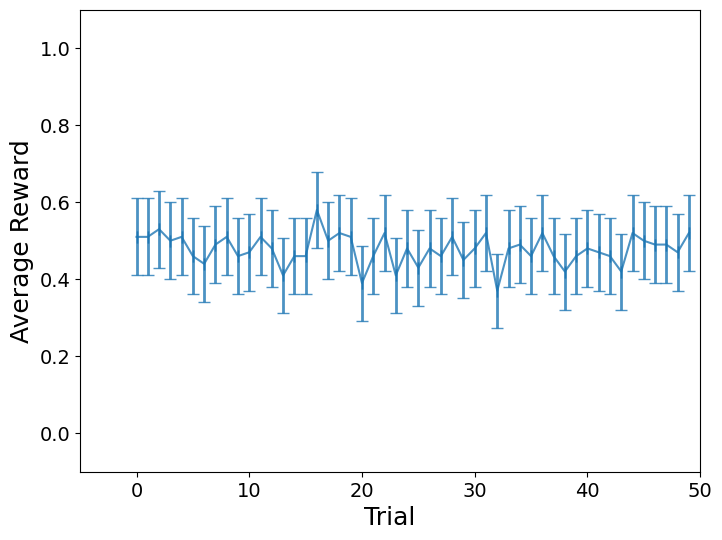

In [4]:
#This script calls the function monkey_nn.m (1 episode)
#The code has been developed as a demo, see if you can improve it.
#For instance there is no check whether the parameters are correct or not.


#Parameter setup
nTrials = 50        # should be integer >0
learningRate = 0.5  # should be real (0-1), Greater than 0
epsilon = 0.0       # should be real (0-1), Greater or Equal to 0; epsilon=0 Greedy, otherwise epsilon-Greedy

repetitions = 100   # number of episodes, should be integer, greater than 0; for statistical reasons

totalRewards = np.zeros((repetitions,nTrials))

fontSize = 18

# Start iterations over episodes
for j in range(repetitions):
    totalRewards[j,:] = monkey_nn(nTrials,learningRate,epsilon)

# Plot the average reward as a function of the number of trials 
# --> the average has to be performed over the episodes
plt.figure(figsize = (8, 6))
means = np.mean(totalRewards, axis = 0)
# errorbars are equal to twice standard error i.e. std/sqrt(samples)
errors = 2 * np.std(totalRewards, axis = 0) / np.sqrt(repetitions) 
plt.errorbar(np.arange(nTrials), means, errors, 0, elinewidth = 2, capsize = 4, alpha =0.8)
plt.xlabel('Trial',fontsize = fontSize)
plt.ylabel('Average Reward',fontsize = fontSize)
plt.axis((-(nTrials/10.0),nTrials,-0.1,1.1))
plt.tick_params(axis = 'both', which='major', labelsize = 14)
plt.show()